## Cancer prediction

This project is using the famous dataset "breast_cancer" from sklearn to build a knn classifier in order to predict new cancer cases

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [4]:
# Creation of the dataset
    
df_cancer1 = pd.DataFrame(cancer["data"])
df_cancer1.columns = cancer["feature_names"]
    
df_cancer2 = pd.DataFrame(cancer["target"])
df_cancer2.columns = ["target"]
    
cancerdf = pd.merge(df_cancer1, df_cancer2, how='outer', left_index=True, right_index=True)

In [5]:
# Check for a possible unbalanced class distribution

targ = cancerdf["target"].replace(0,"malignant").replace(1,"benign")
targ.name = "target"
    
targ = pd.value_counts(targ)

print(targ)

benign       357
malignant    212
Name: target, dtype: int64


In [6]:
# Creation of the training / test data
from sklearn.model_selection import train_test_split

y = cancerdf["target"]
X = cancerdf.drop("target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Creation and fit of a knn classifier
from sklearn.neighbors import KNeighborsClassifier
    
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
# Cross validation for recall with 5 plits
# I chose the recall metric because we want to focus on the true positives prediction for a better malignant prediction
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5, scoring="recall")
print(scores.mean())

0.9411971830985915


In [13]:
# Check for the best param n_neighbors with GridSearch
from sklearn.model_selection import GridSearchCV

grid_values = {"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 10, 15, 20]}
grid_knn = GridSearchCV(knn, param_grid = grid_values, scoring = 'recall').fit(X_train, y_train)
print("Best param :",grid_knn.best_params_)

Best param : {'n_neighbors': 15}


In [14]:
# Fit a new knn model with best param

knn2 = KNeighborsClassifier(n_neighbors = 15)
knn2.fit(X_train, y_train)

scores2 = cross_val_score(knn2, X, y, cv=5, scoring="recall")
print(scores2.mean())

0.9663536776212833


<IPython.core.display.Javascript object>


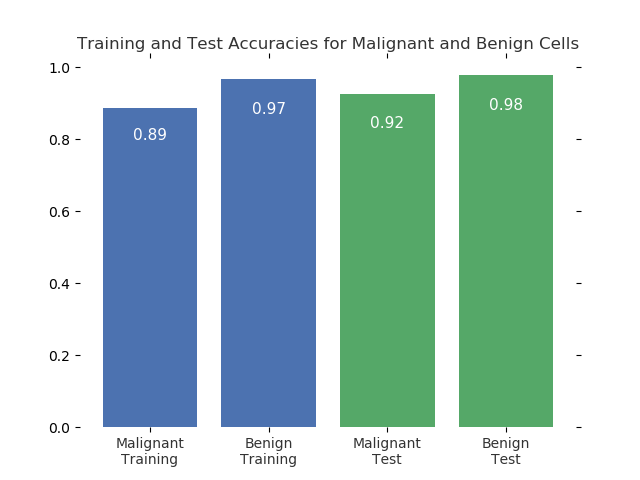

Text(0.5, 1.0, 'Training and Test Accuracies for Malignant and Benign Cells')

In [17]:
# Plot of the accuracy score of the knn2 model for both malignant and benign prediction
import matplotlib.pyplot as plt
%matplotlib notebook

# Find the training and testing accuracies by target value (i.e. malignant, benign)
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]

scores = [knn2.score(mal_train_X, mal_train_y), knn2.score(ben_train_X, ben_train_y), 
          knn2.score(mal_test_X, mal_test_y), knn2.score(ben_test_X, ben_test_y)]


plt.figure()

# Plot the scores as a bar chart
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

# directly label the score onto the bars
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                   ha='center', color='w', fontsize=11)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)